In [ ]:
## https://github.com/tesseract-ocr/tesseract/blob/master/doc/tesseract.1.asc

In [5]:
import cv2 
import pytesseract
import numpy as np
from PIL import Image

In [4]:
custom_config = r'--dpi 300'
image_1 = cv2.imread("INVOICE2.jpg", config = custom_config)

TypeError: 'config' is an invalid keyword argument for this function

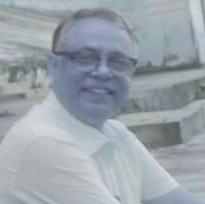

In [53]:
image_1 = cv2.imread('me.jpg')

image_1_pil = Image.fromarray(image_1)
display(image_1_pil)

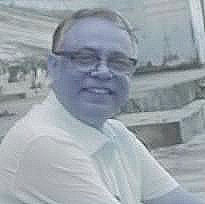

In [54]:
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))
laplacian = np.array(([0, 1, 0],[1, -4, 1],[0, 1, 0]), dtype="int")
sharpen = np.array(([0, -1, 0],[-1, 5, -1],[0, -1, 0]), dtype="int")

opencvOutput = cv2.filter2D(image_1, -1, sharpen)

opencvOutput_pil = Image.fromarray(opencvOutput)
opencvOutput_pil.save('me_s.jpg')

display(opencvOutput_pil)

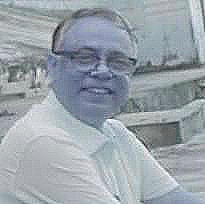

In [55]:
sharpen = np.array(([0, -2, 0],[-2, 7, -1],[0, -1, 0]), dtype="int")

opencvOutput = cv2.filter2D(image_1, -1, sharpen)

opencvOutput_pil = Image.fromarray(opencvOutput)

display(opencvOutput_pil)

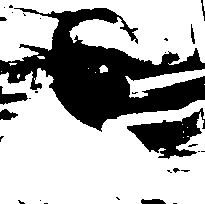

In [39]:
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

image_2 = cv2.imread("me.jpg", 0) ## Loading image directly as black & white.
op = thresholding(image_2)
op_pil = Image.fromarray(op)
display(op_pil)

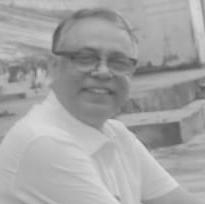

In [44]:
column = Image.open('me.jpg')
gray = column.convert('L') # Converts color photo to b-w photo
blackwhite_1 = gray.point(lambda x: 0 if x < 150 else 255, '1') # Makes the b-w photo very sharp
## x < 200 else 255: fine-tune the value of 200 to any other values range from 0 to 255.
## Check the output file to determine the appropriate value.
## We see difference between gray and blackwhite just by displayint the two
#blackwhite_1.save("invoice1_bw.jpg") # Saves INVOICE photo in color as invoice1_bw in black & white in Jupyter
gray

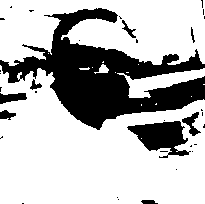

In [45]:
blackwhite_1

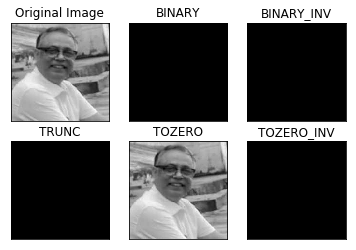

In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('me.jpg',0)
ret,thresh1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,100,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,100,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,100,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,100,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

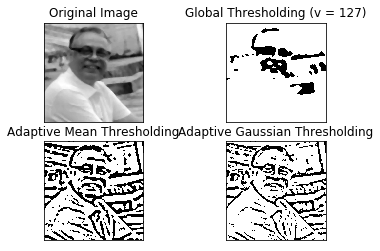

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('me.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

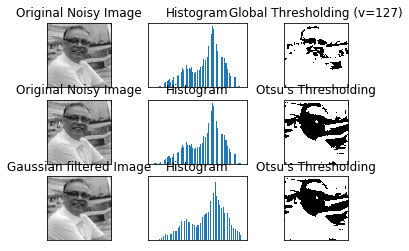

In [63]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('me.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


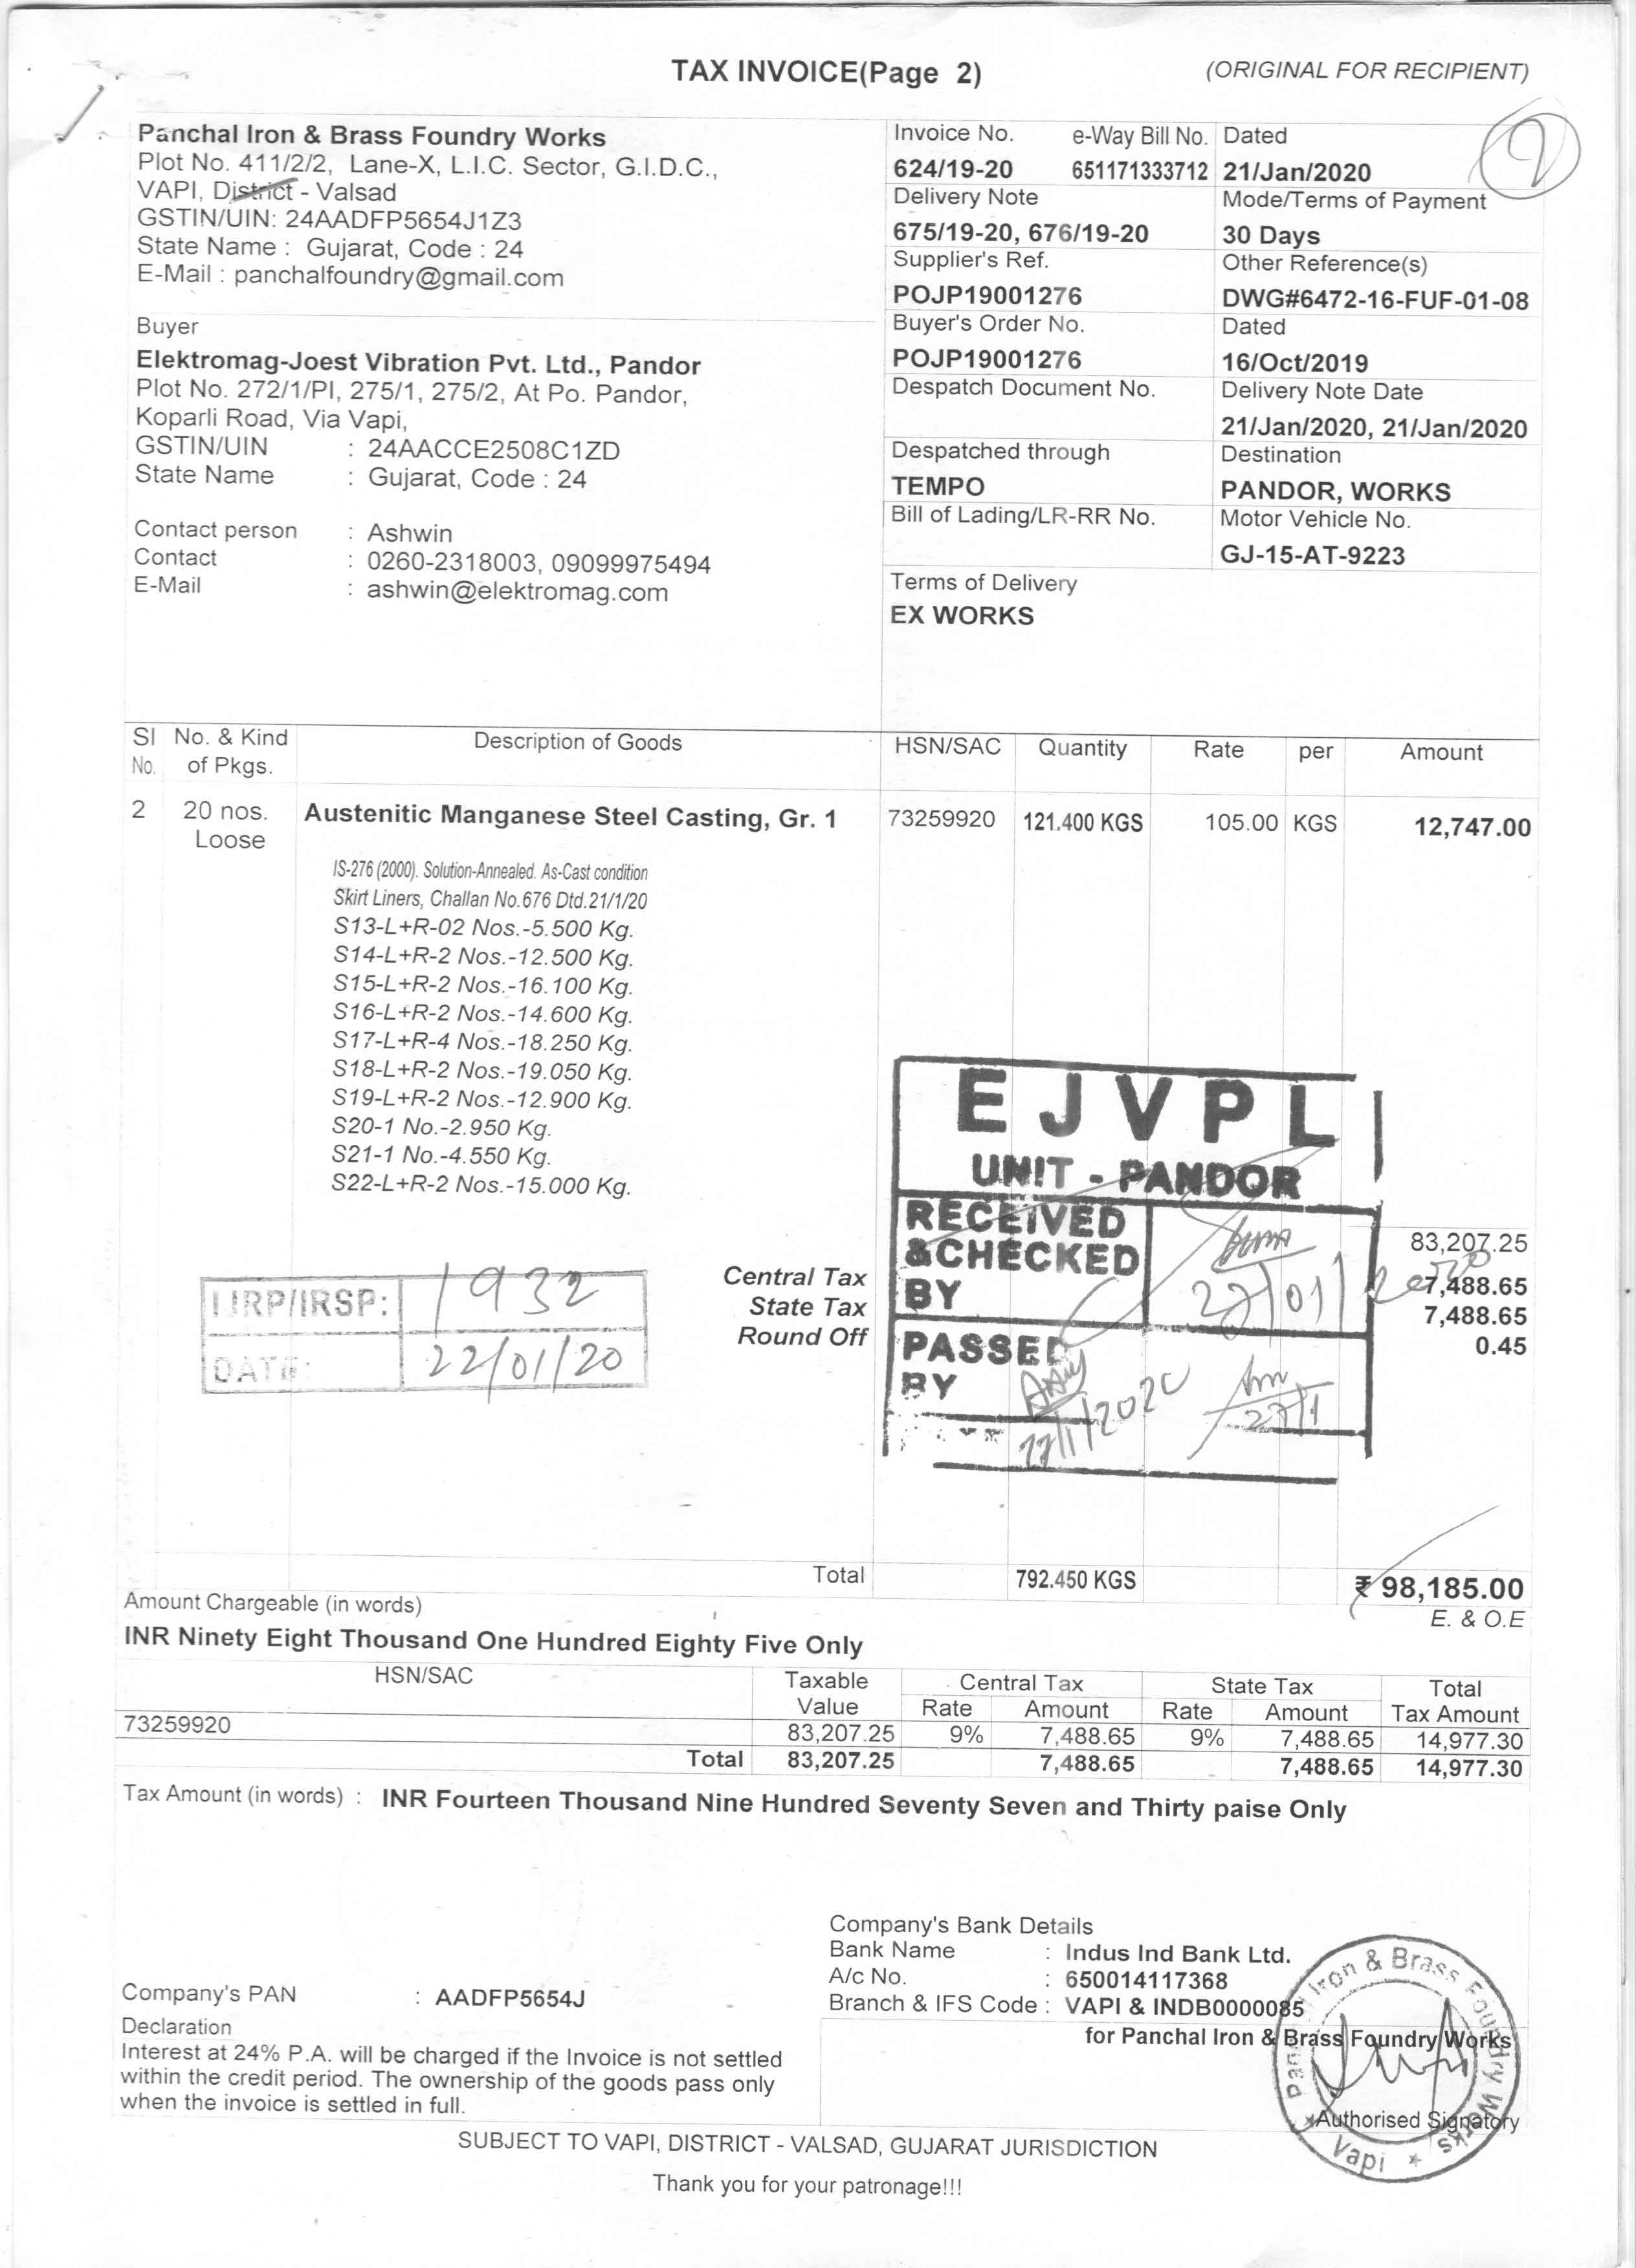

In [71]:
image_1 = cv2.imread("INVOICE2.jpg", 0) ## Loading image directly as black & white.

#blur = cv2.bilateralFilter(image_1,9, 75, 75)

blur = cv2.bilateralFilter(image_1, 100, 0, 0)

blur_pil = Image.fromarray(blur)
display(blur_pil)

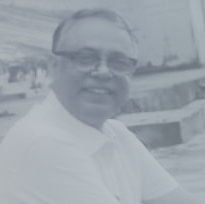

In [74]:
image_1 = cv2.imread("me.jpg")

#blur = cv2.bilateralFilter(image_1,9, 75, 75)

blur = cv2.bilateralFilter(image_1, 0, 75, 75)

blur_pil = Image.fromarray(blur)
display(blur_pil)